### homework8：用matlab或python实现大津法和迭代法阈值分割，并实验比较两者的性能差别

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def DaJing(im):
    start_dj=time.time()
    n,m=im.shape
    N=n*m
    img=im.copy()
    img=img.reshape(N)
    mask=np.ones(img.shape)
    mu=sum(img)/N #mu=sum(i*Pi)=sum(i*Ni)/N
    delta_max=0
    k=0
    for i in range(256):
        c0=(img<i)*mask
        c1=(img>=i)*mask
        w0=sum(c0)/N
        w1=sum(c1)/N
        mu0=sum(c0*img)/N/w0
        mu1=sum(c1*img)/N/w1
        delta=w0*(mu-mu0)**2+w1*(mu-mu1)**2
        if delta>delta_max:
            delta_max=delta
            k=i
    
    
    print('大津法阈值为：',k)
    im_1=im.copy()  #直接用im，好像会让lena也被修改
    im_1[im<k] = 0
    im_1[im>k] = 255
    end_dj= time.time()
    print('大津法耗时：',end_dj-start_dj)
            
    return im_1
        

In [6]:
def iterate(im):
    start_dd=time.time()
    n,m=im.shape
    N=n*m
    T0=np.median(im) 
    T1=0
    mask=np.ones(im.shape)
    while abs(T1-T0)>0:
        c0=(im<T0)*mask
        c1=(im>=T0)*mask
        w0 = sum(sum(c0)) / N
        w1 = sum(sum(c1)) / N
        mu0 = sum(sum(c0 * im)) / N / w0
        mu1 = sum(sum(c1 * im)) / N / w1
        T1=T0
        T0=np.int32(1/2*(mu0+mu1))
        
    print('迭代法阈值为：',T0)
    im_2=im.copy()
    im_2[im<T0] = 0
    im_2[im>T0] = 255
    end_dd= time.time()
    print('迭代法耗时：',end_dd-start_dd)    
    
    return im_2

D:\soft\study\anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
D:\soft\study\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


大津法阈值为： 102
大津法耗时： 30.594983339309692
迭代法阈值为： 101
迭代法耗时： 0.0491480827331543


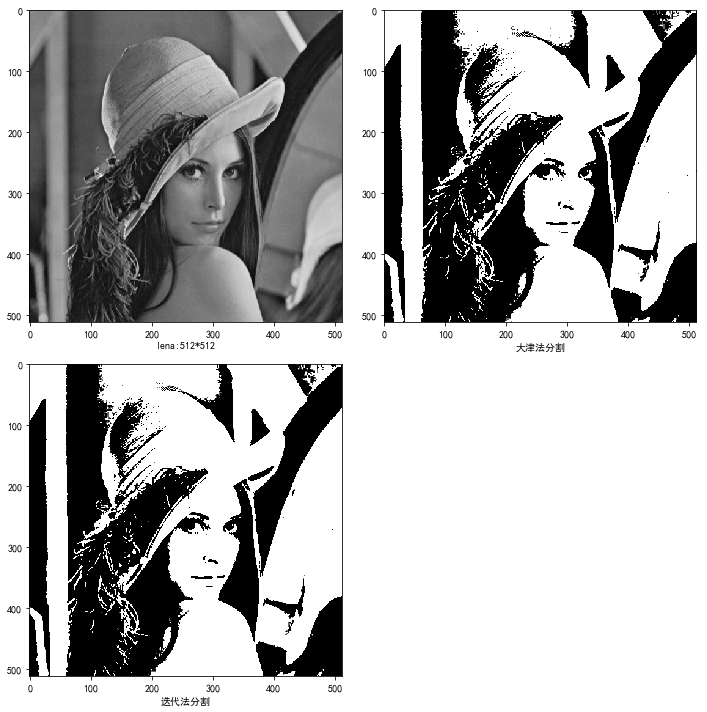

'\n定性比较分割图：大津法分割结果和迭代法分割结果相差不大。但是迭代法耗时比大津法快了600倍。\n'

In [7]:
lena = cv2.imread('lena.jpg',0)

lena_dajing=DaJing(lena)
lena_iterate=iterate(lena)

plt.figure(figsize=(10, 10))
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.subplot(221), plt.imshow(lena, 'gray'),plt.xlabel('lena:512*512')
plt.subplot(222), plt.imshow(lena_dajing, 'gray'),plt.xlabel('大津法分割')
plt.subplot(223), plt.imshow(lena_iterate, 'gray'),plt.xlabel('迭代法分割')
plt.tight_layout()
plt.show()

'''
定性比较分割图：大津法分割结果和迭代法分割结果相差不大。但是迭代法耗时比大津法快了600倍。
'''